In [29]:
#import libreries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [3]:
#import dataset
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
data1[data1.duplicated()] # no duplicate data

,RDS,ADMS,MKTS,State,Profit


In [8]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
#Correlation analysis
data1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


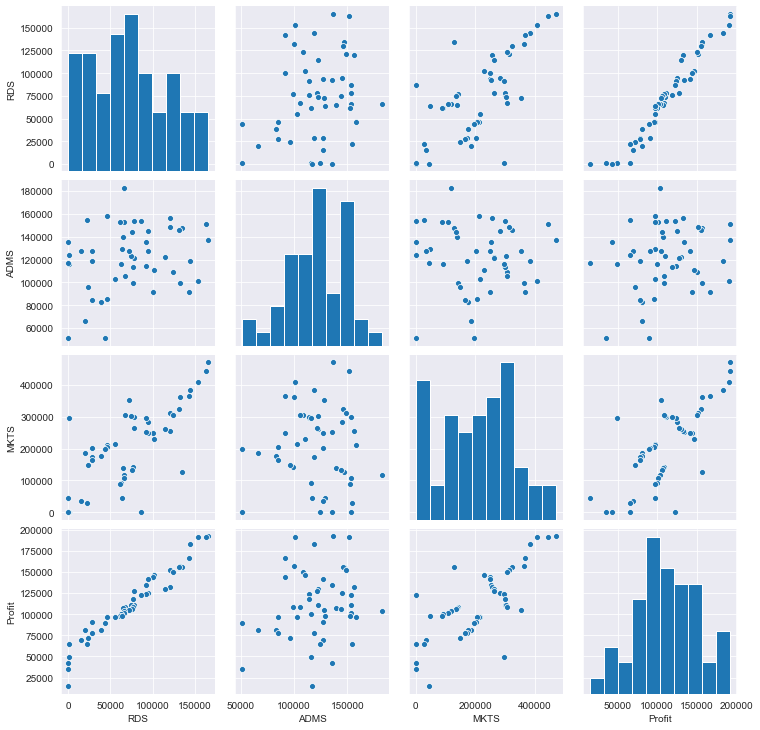

In [12]:
sns.set_style(style="darkgrid")
sns.pairplot(data1)

In [14]:
#model Bulding
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

In [16]:
#finding coffecent variable
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [17]:
#finding t and p value
model.tvalues ,model.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 ADMS         6.017551e-01
 MKTS         1.047168e-01
 dtype: float64)

In [18]:
#finding r squared value
model.rsquared , model.rsquared_adj # model accurency is 94.7%

(0.9507459940683246, 0.9475337762901719)

In [19]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [22]:
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues # ADMS has in-significant pvalue

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [24]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues # MKTS has significant pvalue

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [25]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

In [26]:
# MODEL VALIDATION 

In [27]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [28]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

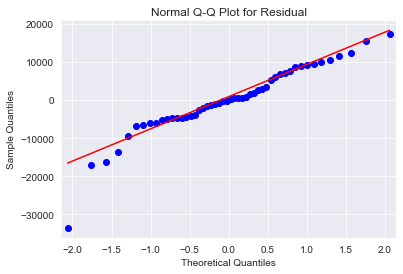

In [30]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q Plot for Residual")
plt.show()

In [32]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [33]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

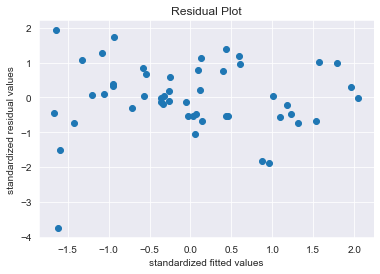

In [34]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [35]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

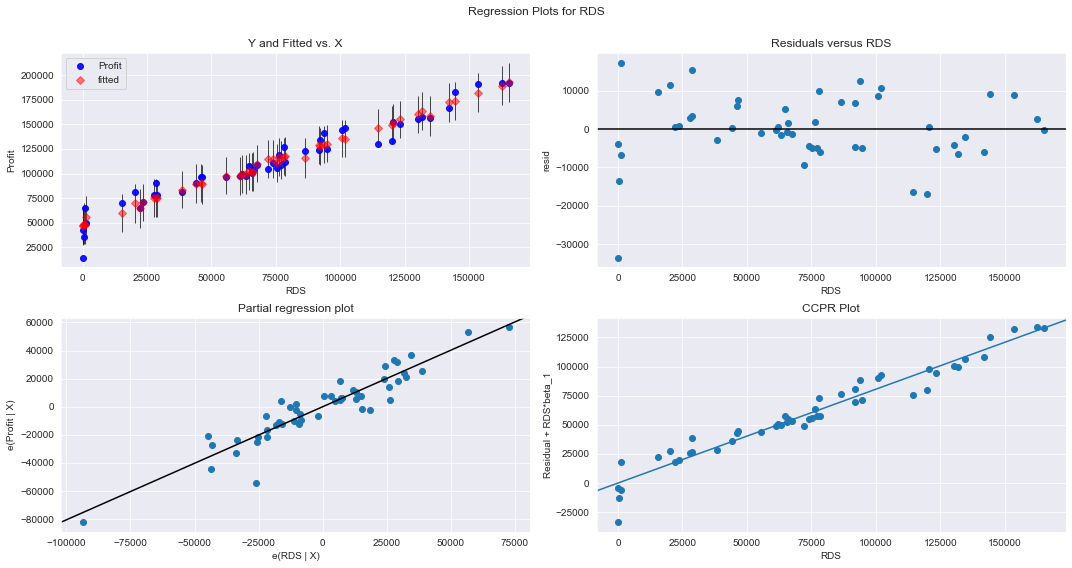

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

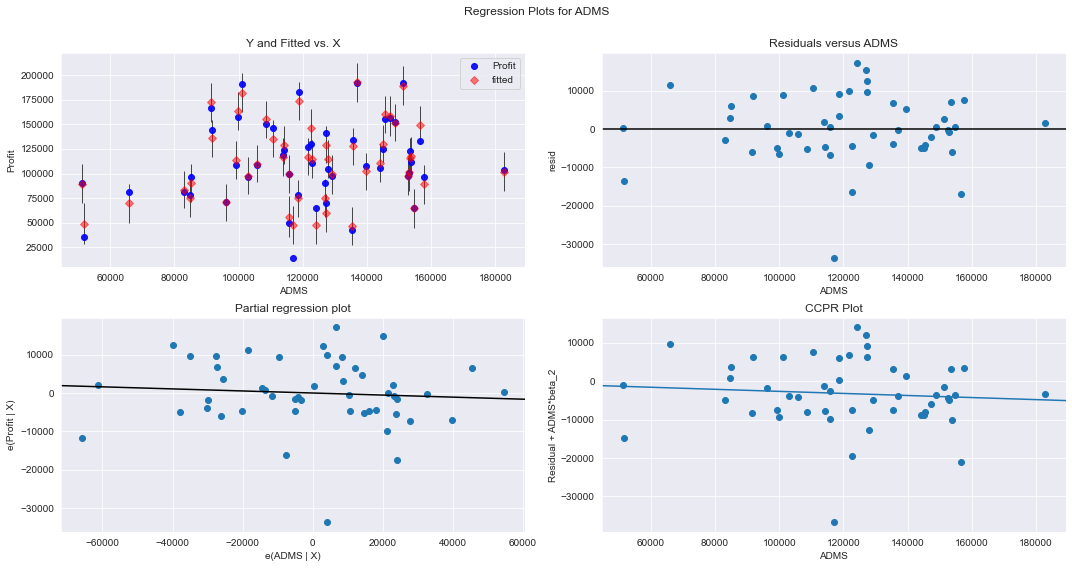

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

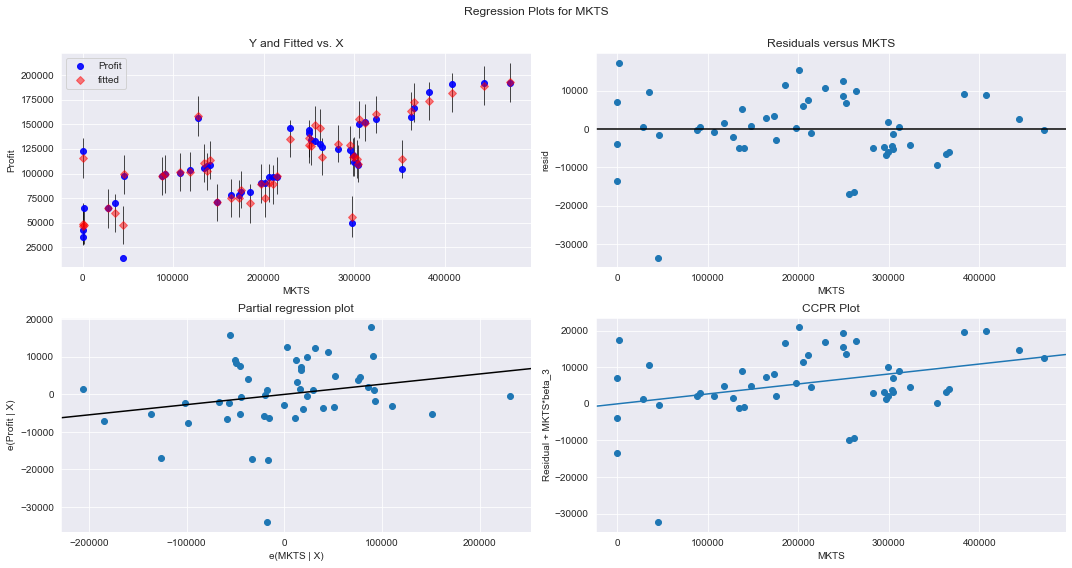

In [38]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

In [39]:
# MODEL DELETION 

In [40]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-41-099d41a6999a>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)),np.round(c,5))


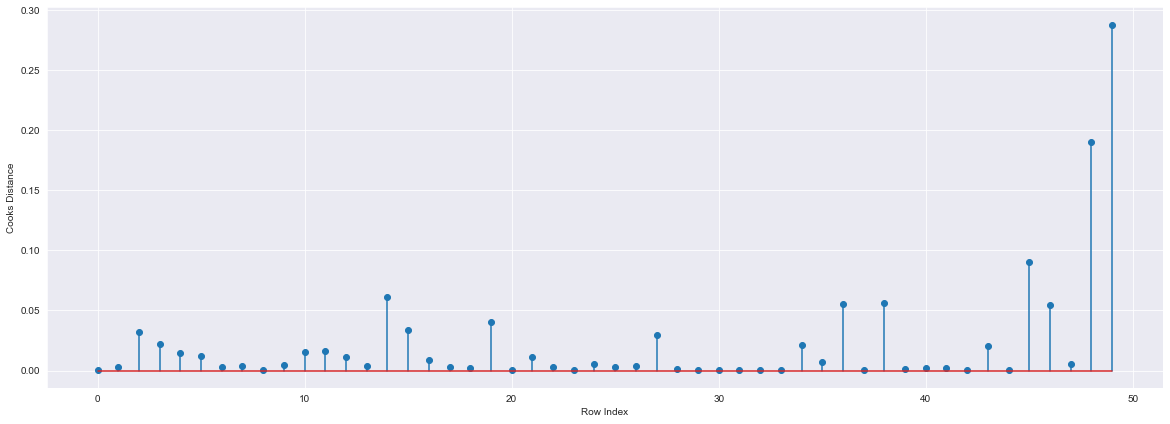

In [41]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

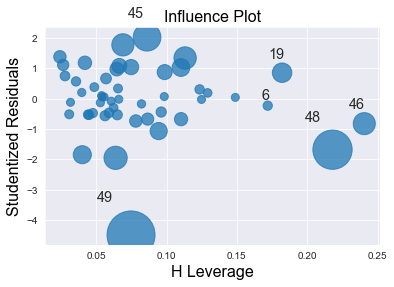

In [43]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [44]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [45]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [46]:
#IMPROVING THE MODEL

In [47]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
#MODEL DELETION AND FINAL MODEL

In [49]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()

In [50]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [51]:
final_model.rsquared

0.9882757054424702

In [52]:
data2

,RDS,ADMS,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [53]:
#MODEL PREDICTION

In [54]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [55]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [56]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [57]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
